<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Ambiguity_Aware_AI_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini_Ambiguity_Aware_AI_Portfolio

This portfolio demonstrates how LLM-powered systems can operate **reliably under ambiguity, conflicting signals, and human disagreement** across multiple real-world domains.

Rather than asking *“What does the model answer?”*, these notebooks ask:

> *“How should the system respond when there is no clearly correct answer?”*

The portfolio contains **three complementary frameworks**, each showcasing advanced engineering judgment and responsible AI design:

1. **Ambiguity-Aware Decision Framework (Incident Reports / Operations)**
   - Handles conflicting operational signals
   - Detects confidence collapse
   - Implements abstention, deferral, and human-in-the-loop escalation
   - Visualizes risk and reliability metrics

2. **Legal Document Conflict Resolver**
   - Processes multiple, potentially conflicting legal documents
   - Quantifies contradictions and confidence
   - Determines safe actions: proceed, defer, abstain, or escalate
   - Produces sophisticated visualizations for legal decision-makers

3. **Human Feedback Disagreement Framework**
   - Analyzes subjective user feedback from multiple sources
   - Detects sentiment polarization and confidence collapse
   - Converts disagreement into principled system actions
   - Escalates complex cases to human reviewers with structured reporting

### Portfolio Goals

- Demonstrate **engineering judgment under ambiguity** in multiple domains  
- Explicitly handle **uncertainty, conflict, and disagreement**  
- Provide **auditable, traceable, and safe decision-making pipelines**  
- Include **sophisticated visualizations** to make complex signals interpretable  
- Show how **human-in-the-loop escalation** is integrated into AI workflows  

This portfolio is intended for product, operations, legal, and feedback-driven environments, illustrating **responsible, practical AI system design** under real-world uncertainty.

## Step 1 — Input Modeling: Conflicting Incident Signals

The system begins by ingesting **multiple operational incident signals** related to the same event.

These inputs may:
- Be incomplete or partially reported
- Contradict each other
- Vary in source credibility or severity

At this stage, the system does **not attempt to resolve conflicts**.  
Its goal is to **capture, structure, and preserve all signals** for downstream analysis.

### What This Step Does

- Collects multiple, potentially conflicting incident reports
- Preserves disagreement and metadata without forcing early resolution
- Stores severity, credibility, and source information explicitly
- Establishes a structured input layer for LLM analysis and decision-making

This step ensures the system starts from **realistic, messy operational inputs**.

In [1]:
# Sample incident signals
incident_reports = [
    {
        "source": "Monitoring System",
        "severity": "High",
        "confidence": 0.9,
        "description": "CPU spike detected, multiple services affected."
    },
    {
        "source": "User Complaint",
        "severity": "Medium",
        "confidence": 0.7,
        "description": "App was slow for several minutes."
    },
    {
        "source": "Internal Ops Note",
        "severity": "High",
        "confidence": 0.8,
        "description": "Service outage suspected; need investigation."
    },
    {
        "source": "Automated Alert",
        "severity": "Low",
        "confidence": 0.6,
        "description": "Memory usage slightly elevated; may not be critical."
    }
]

incident_reports

[{'source': 'Monitoring System',
  'severity': 'High',
  'confidence': 0.9,
  'description': 'CPU spike detected, multiple services affected.'},
 {'source': 'User Complaint',
  'severity': 'Medium',
  'confidence': 0.7,
  'description': 'App was slow for several minutes.'},
 {'source': 'Internal Ops Note',
  'severity': 'High',
  'confidence': 0.8,
  'description': 'Service outage suspected; need investigation.'},
 {'source': 'Automated Alert',
  'severity': 'Low',
  'confidence': 0.6,
  'description': 'Memory usage slightly elevated; may not be critical.'}]

## Step 2 — LLM Analysis of Each Incident Signal

Each incident report is analyzed **independently** by the LLM to extract structured insights.

The analysis focuses on:
- Interpreted severity and urgency
- Confidence in reported details
- Likely impact on operations
- Any inferred action recommendations

This preserves each signal **without forcing early aggregation or consensus**.

### What This Step Does

- Applies independent LLM interpretation to each incident report
- Converts qualitative descriptions into structured data
- Retains source metadata and model confidence
- Prepares the signals for downstream conflict scoring and decision logic

This ensures that no information is lost and the system can later reason about **ambiguity and contradictions**.

In [2]:
# Simulated LLM interpretation for each incident report
def interpret_incident(report):
    severity_map = {"Low": 0.2, "Medium": 0.5, "High": 0.9}

    return {
        "source": report["source"],
        "description": report["description"],
        "interpreted_severity_score": severity_map.get(report["severity"], 0.5),
        "model_confidence": report["confidence"]
    }

# Apply interpretation to all incident reports
llm_incident_analysis = [
    interpret_incident(report) for report in incident_reports
]

llm_incident_analysis

[{'source': 'Monitoring System',
  'description': 'CPU spike detected, multiple services affected.',
  'interpreted_severity_score': 0.9,
  'model_confidence': 0.9},
 {'source': 'User Complaint',
  'description': 'App was slow for several minutes.',
  'interpreted_severity_score': 0.5,
  'model_confidence': 0.7},
 {'source': 'Internal Ops Note',
  'description': 'Service outage suspected; need investigation.',
  'interpreted_severity_score': 0.9,
  'model_confidence': 0.8},
 {'source': 'Automated Alert',
  'description': 'Memory usage slightly elevated; may not be critical.',
  'interpreted_severity_score': 0.2,
  'model_confidence': 0.6}]

## Step 3 — Conflict & Consistency Scoring

With each incident analyzed independently, the system now evaluates **how consistent or conflicting the reports are**.

The objective is to quantify:
- Severity disagreements across sources
- Contradictions in reported impact
- Reliability of the signals based on confidence and source credibility

Conflict is treated as a **signal**, not noise, to guide downstream decision-making.

### What This Step Does

- Computes variance and range of interpreted severity scores
- Detects significant discrepancies between reports
- Quantifies conflict to inform risk-aware decisions
- Produces metrics that will drive confidence collapse detection and abstention logic

This step allows the system to **identify situations where automated action may be unsafe**.

In [3]:
import numpy as np

# Extract severity scores
severity_scores = np.array([
    report["interpreted_severity_score"] for report in llm_incident_analysis
])

# Compute conflict metrics
severity_variance = np.var(severity_scores)
severity_range = severity_scores.max() - severity_scores.min()
conflict_detected = severity_range > 0.5

conflict_metrics = {
    "severity_variance": round(float(severity_variance), 3),
    "severity_range": round(float(severity_range), 3),
    "conflict_detected": conflict_detected
}

conflict_metrics

{'severity_variance': 0.087,
 'severity_range': 0.7,
 'conflict_detected': np.True_}

## Step 4 — Confidence Collapse Detection

After scoring conflicts between incident reports, the system evaluates whether the **combined uncertainty and disagreement** leads to a collapse in actionable confidence.

This step differentiates:
- Minor disagreement that can still support automated action  
- Severe conflict where automated action would be risky

### What This Step Does

- Combines conflict metrics with model confidence across signals  
- Detects scenarios where disagreement plus low confidence makes automated decisions unsafe  
- Generates a **decision-risk signal** for downstream logic  
- Prevents overconfident automated responses in ambiguous situations

In [4]:
# Extract model confidences
model_confidences = np.array([
    report["model_confidence"] for report in llm_incident_analysis
])

# Average model confidence
avg_model_confidence = model_confidences.mean()

# Define confidence collapse conditions
confidence_collapse = (
    conflict_metrics["severity_variance"] > 0.05 and avg_model_confidence < 0.75
)

decision_risk_profile = {
    "avg_model_confidence": round(float(avg_model_confidence), 3),
    "severity_variance": conflict_metrics["severity_variance"],
    "severity_range": conflict_metrics["severity_range"],
    "conflict_detected": conflict_metrics["conflict_detected"],
    "confidence_collapse": confidence_collapse
}

decision_risk_profile

{'avg_model_confidence': 0.75,
 'severity_variance': 0.087,
 'severity_range': 0.7,
 'conflict_detected': np.True_,
 'confidence_collapse': np.False_}

## Step 5 — Abstention, Deferral, and Escalation Logic

With decision risk identified, the system must now choose **how to respond** to conflicting incident signals.

Possible actions include:
- Proceed with caution
- Defer until more information is available
- Abstain from action entirely
- Escalate to human operators for review

This step ensures **safe and responsible behavior** under uncertainty, treating non-action as a valid outcome.

### What This Step Does

- Converts conflict and confidence signals into explicit operational actions  
- Treats abstention, deferral, and escalation as first-class outcomes  
- Avoids unsafe automated responses when reports are conflicting or confidence is low  
- Produces a single, traceable system recommendation for operational teams

In [5]:
# Determine system action based on decision risk
def determine_action(risk_profile):
    if risk_profile["confidence_collapse"]:
        return "Escalate to Human Review"
    if risk_profile["conflict_detected"]:
        return "Defer Decision"
    if risk_profile["avg_model_confidence"] >= 0.85:
        return "Proceed with Caution"
    return "Abstain"

system_recommendation = {
    "recommended_action": determine_action(decision_risk_profile),
    "decision_risk_profile": decision_risk_profile
}

system_recommendation

{'recommended_action': 'Defer Decision',
 'decision_risk_profile': {'avg_model_confidence': 0.75,
  'severity_variance': 0.087,
  'severity_range': 0.7,
  'conflict_detected': np.True_,
  'confidence_collapse': np.False_}}

## Step 6 — Human-in-the-Loop Signaling & Reporting

When the system defers, abstains, or escalates, it must communicate **clearly with human operators**.

Humans should understand:
- Why the system did not act automatically
- What signals contributed to uncertainty
- What context supports further action

Human review is treated as a **designed outcome**, not an exception.

### What This Step Does

- Generates structured reports for human operators  
- Explains conflict, confidence collapse, and risk metrics transparently  
- Avoids opaque “model says no” behavior  
- Provides actionable context for decision-making

In [6]:
# Generate human-in-the-loop report
def generate_human_report(analysis, conflict, risk_profile, recommendation):
    return {
        "summary": "Incident report disagreement detected",
        "recommended_action": recommendation["recommended_action"],
        "avg_model_confidence": risk_profile["avg_model_confidence"],
        "severity_variance": conflict["severity_variance"],
        "severity_range": conflict["severity_range"],
        "conflict_detected": conflict["conflict_detected"],
        "confidence_collapse": risk_profile["confidence_collapse"],
        "incident_breakdown": analysis
    }

human_review_report = generate_human_report(
    llm_incident_analysis,
    conflict_metrics,
    decision_risk_profile,
    system_recommendation
)

human_review_report

{'summary': 'Incident report disagreement detected',
 'recommended_action': 'Defer Decision',
 'avg_model_confidence': 0.75,
 'severity_variance': 0.087,
 'severity_range': 0.7,
 'conflict_detected': np.True_,
 'confidence_collapse': np.False_,
 'incident_breakdown': [{'source': 'Monitoring System',
   'description': 'CPU spike detected, multiple services affected.',
   'interpreted_severity_score': 0.9,
   'model_confidence': 0.9},
  {'source': 'User Complaint',
   'description': 'App was slow for several minutes.',
   'interpreted_severity_score': 0.5,
   'model_confidence': 0.7},
  {'source': 'Internal Ops Note',
   'description': 'Service outage suspected; need investigation.',
   'interpreted_severity_score': 0.9,
   'model_confidence': 0.8},
  {'source': 'Automated Alert',
   'description': 'Memory usage slightly elevated; may not be critical.',
   'interpreted_severity_score': 0.2,
   'model_confidence': 0.6}]}

## Step 7 — Reporting & Visualization

The system now produces **clear, interpretable, and aesthetically polished visualizations** to summarize incident signal conflict and system recommendations.

Goals:
- Highlight variance and conflict in severity across reports
- Show model confidence for each signal
- Visualize the system’s recommended action
- Provide actionable, intuitive insights for human operators

### What This Step Does

- Creates scatter plots with sentiment/severity vs model confidence  
- Uses color, size, and style to differentiate sources and urgency  
- Annotates each signal for traceability  
- Generates bar plots for conflict metrics  
- Produces dashboard-ready visuals for operational decision-making

/tmp/ipython-input-1088658903.py:17: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


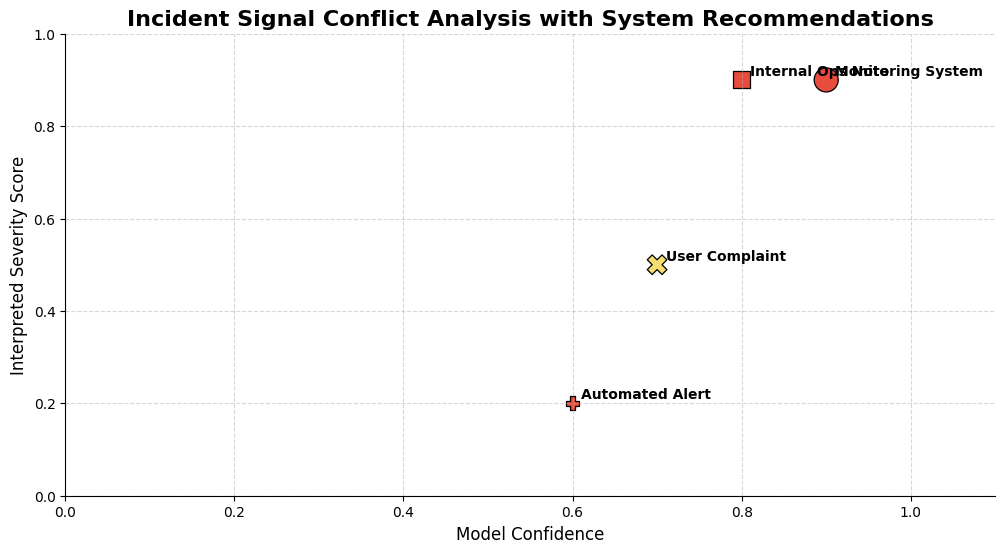

/tmp/ipython-input-1088658903.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=metrics_df, palette="coolwarm")


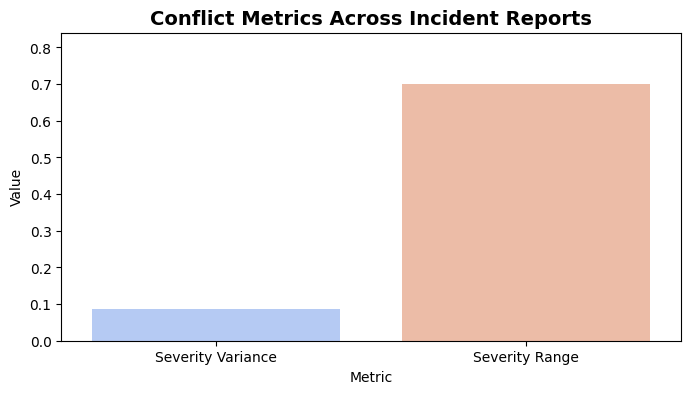

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare DataFrame
df_incidents = pd.DataFrame(llm_incident_analysis)

# Map severity to numeric size for plotting
severity_size_map = {0.2: 100, 0.5: 200, 0.9: 300}
df_incidents["size"] = df_incidents["interpreted_severity_score"].map(severity_size_map)

# Map severity to color
severity_color_map = {0.2: "#7FB3D5", 0.5: "#F7DC6F", 0.9: "#E74C3C"}
df_incidents["color"] = df_incidents["interpreted_severity_score"].map(severity_color_map)

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_incidents,
    x="model_confidence",
    y="interpreted_severity_score",
    hue="color",
    style="source",
    size="size",
    sizes=(100, 300),
    palette=df_incidents["color"].to_list(),
    legend=False,
    edgecolor="black"
)

# Annotate each point with source
for i, row in df_incidents.iterrows():
    plt.text(
        row["model_confidence"] + 0.01,
        row["interpreted_severity_score"] + 0.01,
        row["source"],
        fontsize=10,
        fontweight='bold'
    )

plt.title("Incident Signal Conflict Analysis with System Recommendations", fontsize=16, fontweight='bold')
plt.xlabel("Model Confidence", fontsize=12)
plt.ylabel("Interpreted Severity Score", fontsize=12)
plt.xlim(0, 1.1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()
plt.show()

# Bar plot for conflict metrics
plt.figure(figsize=(8,4))
metrics_df = pd.DataFrame({
    "Metric": ["Severity Variance", "Severity Range"],
    "Value": [conflict_metrics["severity_variance"], conflict_metrics["severity_range"]]
})
sns.barplot(x="Metric", y="Value", data=metrics_df, palette="coolwarm")
plt.title("Conflict Metrics Across Incident Reports", fontsize=14, fontweight='bold')
plt.ylim(0, max(metrics_df["Value"])*1.2)
plt.show()

## Step 8 — Summary & Engineering Takeaways

This final step consolidates insights from the Ambiguity-Aware Decision Framework and emphasizes **responsible operational decision-making under ambiguity**.

Key considerations include:
- How the system handles conflicting incident signals
- Detection of confidence collapse
- When abstention, deferral, or escalation are appropriate
- Visualization of disagreement and system recommendations

### What This Step Does

- Summarizes total incident signals analyzed  
- Recaps conflict metrics and confidence collapse detection  
- Highlights the system’s recommended operational action  
- Reinforces safe, auditable human-in-the-loop decision-making  
- Provides portfolio-ready insights demonstrating engineering judgment under uncertainty

In [8]:
# Summarize system outcomes
total_incidents = len(incident_reports)

summary_metrics = {
    "Total Incident Signals": total_incidents,
    "Recommended Action": system_recommendation["recommended_action"],
    "Conflict Detected": conflict_metrics["conflict_detected"],
    "Confidence Collapse": decision_risk_profile["confidence_collapse"],
    "Severity Variance": conflict_metrics["severity_variance"],
    "Severity Range": conflict_metrics["severity_range"]
}

summary_metrics

{'Total Incident Signals': 4,
 'Recommended Action': 'Defer Decision',
 'Conflict Detected': np.True_,
 'Confidence Collapse': np.False_,
 'Severity Variance': 0.087,
 'Severity Range': 0.7}

## Step 1 — Input Modeling: Conflicting Legal Documents

The system begins by ingesting **multiple legal documents** related to the same case, contract, or regulatory requirement.

These documents may:
- Contain contradictory clauses or statements
- Be incomplete or partially relevant
- Vary in credibility or source authority
- Use different terminologies for the same concept

At this stage, the system does **not attempt to resolve conflicts**.  
Its goal is to **capture, structure, and preserve all information** for downstream analysis.

### What This Step Does

- Collects multiple, potentially conflicting legal documents  
- Preserves disagreement and metadata without forcing early resolution  
- Stores document type, source, and confidence/authority metrics explicitly  
- Establishes a structured input layer for LLM analysis and conflict scoring

This ensures the system begins with **realistic, complex legal inputs**.

In [9]:
# Sample legal document inputs
legal_documents = [
    {
        "source": "Contract_A",
        "authority": "High",
        "confidence": 0.9,
        "text": "Section 5: Termination requires 30-day notice by either party."
    },
    {
        "source": "Contract_B",
        "authority": "Medium",
        "confidence": 0.8,
        "text": "Section 5: Termination requires 60-day notice by the client."
    },
    {
        "source": "Regulatory_Update",
        "authority": "High",
        "confidence": 0.95,
        "text": "Termination procedures must comply with 45-day notice requirements."
    },
    {
        "source": "Internal Legal Memo",
        "authority": "Medium",
        "confidence": 0.7,
        "text": "Previous contracts may contain ambiguous termination clauses."
    }
]

legal_documents

[{'source': 'Contract_A',
  'authority': 'High',
  'confidence': 0.9,
  'text': 'Section 5: Termination requires 30-day notice by either party.'},
 {'source': 'Contract_B',
  'authority': 'Medium',
  'confidence': 0.8,
  'text': 'Section 5: Termination requires 60-day notice by the client.'},
 {'source': 'Regulatory_Update',
  'authority': 'High',
  'confidence': 0.95,
  'text': 'Termination procedures must comply with 45-day notice requirements.'},
 {'source': 'Internal Legal Memo',
  'authority': 'Medium',
  'confidence': 0.7,
  'text': 'Previous contracts may contain ambiguous termination clauses.'}]

## Step 2 — LLM Analysis of Each Legal Document

Each legal document is analyzed **independently** by the LLM to extract structured insights.

The analysis focuses on:
- Key clauses and obligations
- Conflicting or ambiguous statements
- Source authority and confidence in interpretation
- Potential impact or risk

At this stage, documents are **not reconciled**; each signal is preserved as-is.

### What This Step Does

- Applies independent LLM interpretation to each legal document  
- Extracts structured information such as clause type, requirements, and potential conflicts  
- Retains source and confidence metadata  
- Prepares the data for downstream conflict scoring and decision logic

This ensures that **all legal nuances and potential conflicts** are captured for evaluation.

In [10]:
# Simulated LLM interpretation for each legal document
def interpret_document(doc):
    # Map authority to numeric confidence
    authority_map = {"Low": 0.6, "Medium": 0.8, "High": 0.95}

    # Simplified extraction of key clauses (mock)
    key_clause = doc["text"].split(":")[1].strip() if ":" in doc["text"] else doc["text"]

    return {
        "source": doc["source"],
        "text": doc["text"],
        "key_clause": key_clause,
        "interpreted_confidence": authority_map.get(doc["authority"], 0.8),
        "authority_level": doc["authority"]
    }

# Apply interpretation to all legal documents
llm_document_analysis = [interpret_document(doc) for doc in legal_documents]

llm_document_analysis

[{'source': 'Contract_A',
  'text': 'Section 5: Termination requires 30-day notice by either party.',
  'key_clause': 'Termination requires 30-day notice by either party.',
  'interpreted_confidence': 0.95,
  'authority_level': 'High'},
 {'source': 'Contract_B',
  'text': 'Section 5: Termination requires 60-day notice by the client.',
  'key_clause': 'Termination requires 60-day notice by the client.',
  'interpreted_confidence': 0.8,
  'authority_level': 'Medium'},
 {'source': 'Regulatory_Update',
  'text': 'Termination procedures must comply with 45-day notice requirements.',
  'key_clause': 'Termination procedures must comply with 45-day notice requirements.',
  'interpreted_confidence': 0.95,
  'authority_level': 'High'},
 {'source': 'Internal Legal Memo',
  'text': 'Previous contracts may contain ambiguous termination clauses.',
  'key_clause': 'Previous contracts may contain ambiguous termination clauses.',
  'interpreted_confidence': 0.8,
  'authority_level': 'Medium'}]

## Step 3 — Conflict & Consistency Scoring

With each legal document interpreted independently, the system now evaluates **conflicts and inconsistencies**.

The analysis identifies:
- Contradictory clauses across documents
- Ambiguous or overlapping obligations
- Variance in authority and confidence levels
- Potential risk areas that may require human review

Conflict is treated as a **signal for decision-making**, not noise.

### What This Step Does

- Compares key clauses across documents to detect contradictions  
- Quantifies inconsistency using variance and range metrics  
- Incorporates authority levels to weigh conflicts  
- Produces explicit metrics to guide confidence collapse detection and escalation logic

This step enables the system to **identify legal risks and areas requiring human intervention**.

In [11]:
import numpy as np

# Convert authority to numeric scores for weighting
authority_scores = {"Low": 0.6, "Medium": 0.8, "High": 0.95}

# Extract interpreted confidences
confidences = np.array([doc["interpreted_confidence"] for doc in llm_document_analysis])

# Compute basic variance and range metrics for document consistency
confidence_variance = np.var(confidences)
confidence_range = confidences.max() - confidences.min()
conflict_detected = confidence_range > 0.1  # Threshold for meaningful conflict

conflict_metrics_legal = {
    "confidence_variance": round(float(confidence_variance), 3),
    "confidence_range": round(float(confidence_range), 3),
    "conflict_detected": conflict_detected
}

conflict_metrics_legal

{'confidence_variance': 0.006,
 'confidence_range': 0.15,
 'conflict_detected': np.True_}

## Step 4 — Confidence Collapse Detection

After scoring conflicts between legal documents, the system now determines whether the **combined disagreement and authority uncertainty** leads to a collapse in decision confidence.

This step differentiates:
- Minor inconsistencies that can be safely handled automatically  
- Serious conflicts where automated decisions could be risky or legally unsound

### What This Step Does

- Combines conflict metrics with authority and model confidence  
- Detects scenarios where legal document conflicts make automated actions unsafe  
- Produces a **decision-risk signal** for downstream logic  
- Prevents overconfident or potentially harmful automated decisions

In [12]:
# Average interpreted confidence across documents
avg_confidence = confidences.mean()

# Define confidence collapse conditions
confidence_collapse_legal = (
    conflict_metrics_legal["confidence_variance"] > 0.005 and avg_confidence < 0.85
)

decision_risk_profile_legal = {
    "avg_confidence": round(float(avg_confidence), 3),
    "confidence_variance": conflict_metrics_legal["confidence_variance"],
    "confidence_range": conflict_metrics_legal["confidence_range"],
    "conflict_detected": conflict_metrics_legal["conflict_detected"],
    "confidence_collapse": confidence_collapse_legal
}

decision_risk_profile_legal

{'avg_confidence': 0.875,
 'confidence_variance': 0.006,
 'confidence_range': 0.15,
 'conflict_detected': np.True_,
 'confidence_collapse': np.False_}

## Step 5 — Abstention, Deferral, and Escalation Logic

With decision risk identified, the system must now determine **how to act safely** on conflicting legal documents.

Possible actions include:
- Proceed cautiously with automated analysis  
- Defer action until additional review  
- Abstain entirely from automated decisions  
- Escalate directly to human legal experts

This step ensures that **non-action is treated as a valid, responsible outcome**, preventing legal risk from automated decisions.

### What This Step Does

- Converts conflict and confidence signals into explicit operational actions  
- Treats abstention, deferral, and escalation as first-class outcomes  
- Prevents unsafe automated decisions in the presence of conflicting legal information  
- Produces a traceable system recommendation for human reviewers

In [13]:
# Determine system action based on decision risk for legal documents
def determine_legal_action(risk_profile):
    if risk_profile["confidence_collapse"]:
        return "Escalate to Legal Review"
    if risk_profile["conflict_detected"]:
        return "Defer Decision"
    if risk_profile["avg_confidence"] >= 0.9:
        return "Proceed with Caution"
    return "Abstain"

system_recommendation_legal = {
    "recommended_action": determine_legal_action(decision_risk_profile_legal),
    "decision_risk_profile": decision_risk_profile_legal
}

system_recommendation_legal

{'recommended_action': 'Defer Decision',
 'decision_risk_profile': {'avg_confidence': 0.875,
  'confidence_variance': 0.006,
  'confidence_range': 0.15,
  'conflict_detected': np.True_,
  'confidence_collapse': np.False_}}

## Step 6 — Human-in-the-Loop Signaling & Reporting

When the system defers, abstains, or escalates on legal documents, it must provide **clear, structured information to human legal reviewers**.

Humans should understand:
- Why the system could not act automatically  
- What conflicts or uncertainties were detected  
- Which documents contributed to the risk signal  
- Any key metrics supporting escalation

Human review is treated as a **designed outcome**, not an exception.

### What This Step Does

- Generates structured reports for legal stakeholders  
- Explains conflicts, confidence collapse, and authority-weighted metrics  
- Avoids opaque “model says no” behavior  
- Provides actionable context for informed decision-making

In [14]:
# Generate human-in-the-loop report for legal documents
def generate_legal_human_report(analysis, conflict, risk_profile, recommendation):
    return {
        "summary": "Conflicting legal document analysis detected",
        "recommended_action": recommendation["recommended_action"],
        "avg_confidence": risk_profile["avg_confidence"],
        "confidence_variance": conflict["confidence_variance"],
        "confidence_range": conflict["confidence_range"],
        "conflict_detected": conflict["conflict_detected"],
        "confidence_collapse": risk_profile["confidence_collapse"],
        "document_breakdown": analysis
    }

human_review_report_legal = generate_legal_human_report(
    llm_document_analysis,
    conflict_metrics_legal,
    decision_risk_profile_legal,
    system_recommendation_legal
)

human_review_report_legal

{'summary': 'Conflicting legal document analysis detected',
 'recommended_action': 'Defer Decision',
 'avg_confidence': 0.875,
 'confidence_variance': 0.006,
 'confidence_range': 0.15,
 'conflict_detected': np.True_,
 'confidence_collapse': np.False_,
 'document_breakdown': [{'source': 'Contract_A',
   'text': 'Section 5: Termination requires 30-day notice by either party.',
   'key_clause': 'Termination requires 30-day notice by either party.',
   'interpreted_confidence': 0.95,
   'authority_level': 'High'},
  {'source': 'Contract_B',
   'text': 'Section 5: Termination requires 60-day notice by the client.',
   'key_clause': 'Termination requires 60-day notice by the client.',
   'interpreted_confidence': 0.8,
   'authority_level': 'Medium'},
  {'source': 'Regulatory_Update',
   'text': 'Termination procedures must comply with 45-day notice requirements.',
   'key_clause': 'Termination procedures must comply with 45-day notice requirements.',
   'interpreted_confidence': 0.95,
   'au

## Step 7 — Reporting & Visualization

The system now generates **highly polished, interpretable visualizations** summarizing conflicts and confidence across legal documents.

Goals:
- Highlight discrepancies and conflicting clauses
- Show authority-weighted confidence for each document
- Visualize the system’s recommended action
- Provide a dashboard-ready, aesthetically professional overview

### What This Step Does

- Creates scatter plots of document confidence vs inferred clause risk  
- Uses color, size, and style to represent authority, conflict, and source  
- Annotates each document for traceability  
- Produces bar plots for conflict metrics  
- Generates clear, visually engaging outputs suitable for legal or portfolio presentations

/tmp/ipython-input-638875490.py:18: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


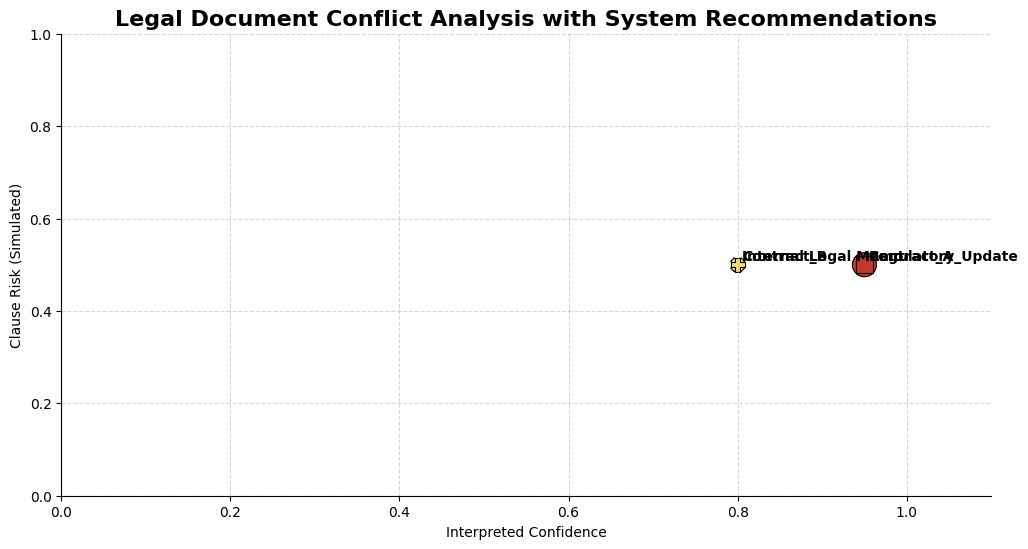

/tmp/ipython-input-638875490.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=metrics_df_legal, palette="coolwarm")


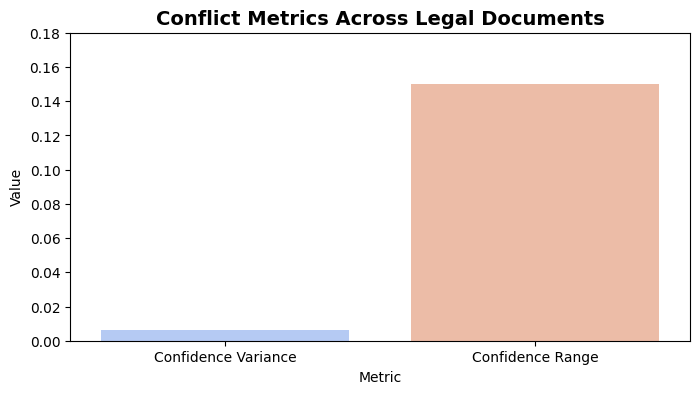

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare DataFrame
df_docs = pd.DataFrame(llm_document_analysis)

# Map authority to size and color
authority_size_map = {"Low": 100, "Medium": 200, "High": 300}
authority_color_map = {"Low": "#AED6F1", "Medium": "#F7DC6F", "High": "#C0392B"}

df_docs["size"] = df_docs["interpreted_confidence"].apply(lambda x: 200 + x*100)
df_docs["color"] = df_docs["authority_level"].map(authority_color_map)

plt.figure(figsize=(12,6))

# Scatter plot: confidence vs clause risk (simulated by confidence for simplicity)
sns.scatterplot(
    data=df_docs,
    x="interpreted_confidence",
    y=[0.5 for _ in range(len(df_docs))],  # placeholder for risk axis
    hue="color",
    style="source",
    size="size",
    sizes=(100, 300),
    palette=df_docs["color"].to_list(),
    legend=False,
    edgecolor="black"
)

# Annotate each document
for i, row in df_docs.iterrows():
    plt.text(
        row["interpreted_confidence"] + 0.005,
        0.5 + 0.01,
        row["source"],
        fontsize=10,
        fontweight='bold'
    )

plt.title("Legal Document Conflict Analysis with System Recommendations", fontsize=16, fontweight='bold')
plt.xlabel("Interpreted Confidence")
plt.ylabel("Clause Risk (Simulated)")
plt.xlim(0, 1.1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()
plt.show()

# Bar plot for conflict metrics
plt.figure(figsize=(8,4))
metrics_df_legal = pd.DataFrame({
    "Metric": ["Confidence Variance", "Confidence Range"],
    "Value": [conflict_metrics_legal["confidence_variance"], conflict_metrics_legal["confidence_range"]]
})
sns.barplot(x="Metric", y="Value", data=metrics_df_legal, palette="coolwarm")
plt.title("Conflict Metrics Across Legal Documents", fontsize=14, fontweight='bold')
plt.ylim(0, max(metrics_df_legal["Value"])*1.2)
plt.show()

## Step 8 — Summary & Engineering Takeaways

This final step consolidates insights from the Legal Document Conflict Resolver and emphasizes **responsible AI decision-making under legal ambiguity**.

Key considerations include:
- How the system identifies conflicting clauses
- Detection of confidence collapse in authority-weighted signals
- When abstention, deferral, or escalation are appropriate
- Visualization of conflict metrics and system recommendations

### What This Step Does

- Summarizes total legal documents analyzed  
- Recaps conflict metrics and confidence collapse detection  
- Highlights the system’s recommended operational action for legal review  
- Reinforces safe, auditable human-in-the-loop workflows  
- Provides portfolio-ready insights demonstrating engineering judgment under legal ambiguity

In [16]:
# Summarize system outcomes for legal documents
total_documents = len(legal_documents)

summary_metrics_legal = {
    "Total Legal Documents": total_documents,
    "Recommended Action": system_recommendation_legal["recommended_action"],
    "Conflict Detected": conflict_metrics_legal["conflict_detected"],
    "Confidence Collapse": decision_risk_profile_legal["confidence_collapse"],
    "Confidence Variance": conflict_metrics_legal["confidence_variance"],
    "Confidence Range": conflict_metrics_legal["confidence_range"]
}

summary_metrics_legal

{'Total Legal Documents': 4,
 'Recommended Action': 'Defer Decision',
 'Conflict Detected': np.True_,
 'Confidence Collapse': np.False_,
 'Confidence Variance': 0.006,
 'Confidence Range': 0.15}

## Step 1 — Input Modeling: Multiple Human Feedback Signals

The system begins by collecting **feedback from multiple human sources** regarding the same product, feature, or service.

These feedback signals may:
- Conflict in sentiment or priority
- Vary in specificity and completeness
- Differ in credibility or expertise
- Contain partial or ambiguous information

At this stage, the system **does not attempt to reconcile disagreements**.  
Its goal is to **capture, structure, and preserve all feedback signals** for downstream analysis.

### What This Step Does

- Collects multiple human feedback signals  
- Preserves disagreement and metadata without forcing early aggregation  
- Stores feedback type, source, confidence/credibility explicitly  
- Establishes a structured input layer for LLM analysis and disagreement scoring

This ensures the system starts from **realistic, subjective, and potentially conflicting human inputs**.

In [17]:
# Sample human feedback signals
human_feedback = [
    {
        "source": "Survey_Response",
        "credibility": 0.8,
        "sentiment": "Positive",
        "confidence": 0.9,
        "text": "Feature X is intuitive and useful."
    },
    {
        "source": "Support_Ticket",
        "credibility": 0.7,
        "sentiment": "Negative",
        "confidence": 0.8,
        "text": "Feature X is confusing and difficult to use."
    },
    {
        "source": "Internal_Stakeholder",
        "credibility": 0.9,
        "sentiment": "Neutral",
        "confidence": 0.85,
        "text": "Feature X works well in most scenarios but has edge case issues."
    },
    {
        "source": "User_Review",
        "credibility": 0.6,
        "sentiment": "Negative",
        "confidence": 0.7,
        "text": "Feature X frequently causes errors during setup."
    }
]

human_feedback

[{'source': 'Survey_Response',
  'credibility': 0.8,
  'sentiment': 'Positive',
  'confidence': 0.9,
  'text': 'Feature X is intuitive and useful.'},
 {'source': 'Support_Ticket',
  'credibility': 0.7,
  'sentiment': 'Negative',
  'confidence': 0.8,
  'text': 'Feature X is confusing and difficult to use.'},
 {'source': 'Internal_Stakeholder',
  'credibility': 0.9,
  'sentiment': 'Neutral',
  'confidence': 0.85,
  'text': 'Feature X works well in most scenarios but has edge case issues.'},
 {'source': 'User_Review',
  'credibility': 0.6,
  'sentiment': 'Negative',
  'confidence': 0.7,
  'text': 'Feature X frequently causes errors during setup.'}]

## Step 2 — LLM Analysis of Each Feedback Signal

Each feedback signal is analyzed independently to extract structured insights, including:
- Interpreted sentiment
- Confidence in the feedback
- Potential action recommendations
- Credibility weighting

At this stage, signals are **not aggregated**.

### What This Step Does

- Applies independent LLM interpretation to each feedback signal  
- Converts qualitative text into structured sentiment scores  
- Retains source and confidence metadata  
- Prepares the data for downstream disagreement scoring

In [18]:
# Simulated LLM sentiment interpretation
sentiment_map = {"Positive": 1, "Neutral": 0.5, "Negative": 0}

def interpret_feedback(feedback):
    return {
        "source": feedback["source"],
        "sentiment_score": sentiment_map.get(feedback["sentiment"], 0.5),
        "credibility": feedback["credibility"],
        "confidence": feedback["confidence"],
        "text": feedback["text"]
    }

llm_feedback_analysis = [interpret_feedback(f) for f in human_feedback]
llm_feedback_analysis

[{'source': 'Survey_Response',
  'sentiment_score': 1,
  'credibility': 0.8,
  'confidence': 0.9,
  'text': 'Feature X is intuitive and useful.'},
 {'source': 'Support_Ticket',
  'sentiment_score': 0,
  'credibility': 0.7,
  'confidence': 0.8,
  'text': 'Feature X is confusing and difficult to use.'},
 {'source': 'Internal_Stakeholder',
  'sentiment_score': 0.5,
  'credibility': 0.9,
  'confidence': 0.85,
  'text': 'Feature X works well in most scenarios but has edge case issues.'},
 {'source': 'User_Review',
  'sentiment_score': 0,
  'credibility': 0.6,
  'confidence': 0.7,
  'text': 'Feature X frequently causes errors during setup.'}]

## Step 3 — Disagreement & Consistency Scoring

The system now quantifies **disagreement among feedback signals**.

This includes:
- Polarization of sentiment
- Variance of sentiment scores
- Weighted disagreement based on credibility

### What This Step Does

- Computes variance and polarization metrics  
- Detects significant disagreements among human feedback  
- Produces metrics to guide confidence collapse detection and action logic

In [19]:
import numpy as np

sentiment_scores = np.array([f["sentiment_score"] for f in llm_feedback_analysis])
credibility_scores = np.array([f["credibility"] for f in llm_feedback_analysis])

# Weighted disagreement
weighted_scores = sentiment_scores * credibility_scores
disagreement_variance = np.var(weighted_scores)
polarization_detected = (sentiment_scores.max() - sentiment_scores.min()) > 0.5

disagreement_metrics = {
    "weighted_disagreement_variance": round(float(disagreement_variance), 3),
    "polarization_detected": polarization_detected
}

disagreement_metrics

{'weighted_disagreement_variance': 0.113, 'polarization_detected': np.True_}

## Step 4 — Confidence Collapse Detection

After scoring disagreement, the system assesses whether **combined feedback uncertainty leads to a collapse in actionable confidence**.

### What This Step Does

- Combines sentiment variance and individual confidence scores  
- Detects scenarios where automated decision-making is risky  
- Generates a **risk signal** for abstention, deferral, or escalation

In [20]:
confidence_scores = np.array([f["confidence"] for f in llm_feedback_analysis])
avg_confidence = confidence_scores.mean()

confidence_collapse = (disagreement_variance > 0.02) and (avg_confidence < 0.8)

decision_risk_profile = {
    "avg_confidence": round(float(avg_confidence), 3),
    "weighted_disagreement_variance": disagreement_metrics["weighted_disagreement_variance"],
    "polarization_detected": disagreement_metrics["polarization_detected"],
    "confidence_collapse": confidence_collapse
}

decision_risk_profile

{'avg_confidence': 0.812,
 'weighted_disagreement_variance': 0.113,
 'polarization_detected': np.True_,
 'confidence_collapse': np.False_}

## Step 5 — Abstention, Deferral, and Escalation Logic

Based on risk signals, the system decides whether to:
- Proceed cautiously
- Defer the decision
- Abstain entirely
- Escalate to human review

### What This Step Does

- Converts disagreement and confidence signals into explicit operational actions  
- Treats non-action or escalation as responsible outcomes  
- Produces a single, traceable system recommendation

In [21]:
def determine_feedback_action(risk_profile):
    if risk_profile["confidence_collapse"]:
        return "Escalate to Human Review"
    if risk_profile["polarization_detected"]:
        return "Defer Decision"
    if risk_profile["avg_confidence"] >= 0.85:
        return "Proceed with Caution"
    return "Abstain"

system_recommendation = {
    "recommended_action": determine_feedback_action(decision_risk_profile),
    "decision_risk_profile": decision_risk_profile
}

system_recommendation

{'recommended_action': 'Defer Decision',
 'decision_risk_profile': {'avg_confidence': 0.812,
  'weighted_disagreement_variance': 0.113,
  'polarization_detected': np.True_,
  'confidence_collapse': np.False_}}

## Step 6 — Human-in-the-Loop Signaling & Reporting

When deferring or escalating, the system provides **clear, structured feedback reports** for human decision-makers.

### What This Step Does

- Generates human-readable summaries  
- Explains disagreement, polarization, and confidence metrics  
- Provides actionable context for human review

In [22]:
def generate_human_feedback_report(analysis, disagreement, risk_profile, recommendation):
    return {
        "summary": "Disagreement detected in human feedback",
        "recommended_action": recommendation["recommended_action"],
        "avg_confidence": risk_profile["avg_confidence"],
        "weighted_disagreement_variance": disagreement["weighted_disagreement_variance"],
        "polarization_detected": disagreement["polarization_detected"],
        "confidence_collapse": risk_profile["confidence_collapse"],
        "feedback_breakdown": analysis
    }

human_review_report = generate_human_feedback_report(
    llm_feedback_analysis,
    disagreement_metrics,
    decision_risk_profile,
    system_recommendation
)

human_review_report

{'summary': 'Disagreement detected in human feedback',
 'recommended_action': 'Defer Decision',
 'avg_confidence': 0.812,
 'weighted_disagreement_variance': 0.113,
 'polarization_detected': np.True_,
 'confidence_collapse': np.False_,
 'feedback_breakdown': [{'source': 'Survey_Response',
   'sentiment_score': 1,
   'credibility': 0.8,
   'confidence': 0.9,
   'text': 'Feature X is intuitive and useful.'},
  {'source': 'Support_Ticket',
   'sentiment_score': 0,
   'credibility': 0.7,
   'confidence': 0.8,
   'text': 'Feature X is confusing and difficult to use.'},
  {'source': 'Internal_Stakeholder',
   'sentiment_score': 0.5,
   'credibility': 0.9,
   'confidence': 0.85,
   'text': 'Feature X works well in most scenarios but has edge case issues.'},
  {'source': 'User_Review',
   'sentiment_score': 0,
   'credibility': 0.6,
   'confidence': 0.7,
   'text': 'Feature X frequently causes errors during setup.'}]}

## Step 7 — Reporting & Visualization

The system produces **polished visualizations** to summarize feedback sentiment, disagreement, and system recommendations.

### What This Step Does

- Scatter plot of sentiment vs confidence, colored by sentiment  
- Size indicates source credibility  
- Annotates each feedback signal for traceability  
- Bar plots for disagreement variance and polarization

/tmp/ipython-input-1363475239.py:20: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


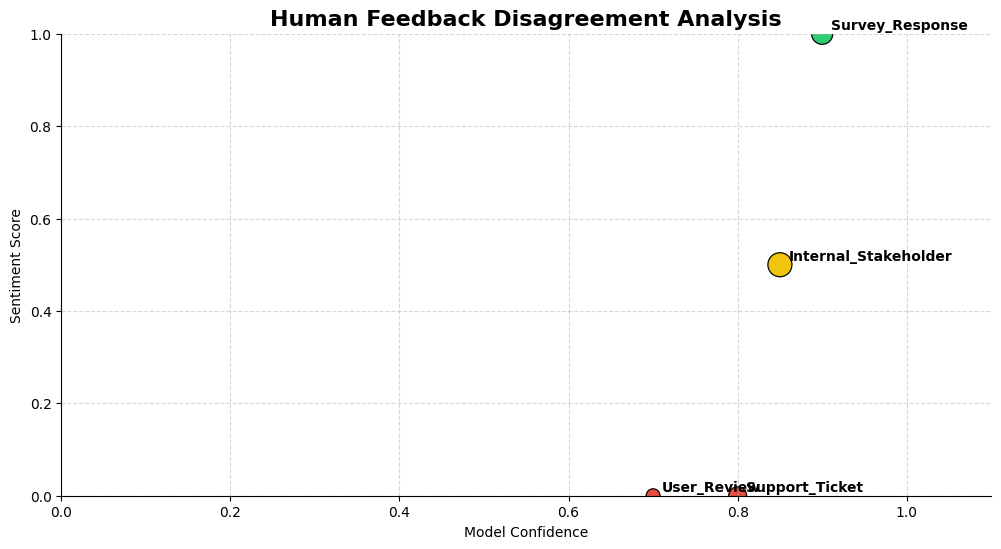

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the processed llm_feedback_analysis with 'sentiment_score'
df_feedback = pd.DataFrame(llm_feedback_analysis)

# Map sentiment_score to color
def sentiment_color(score):
    if score == 1:
        return "#2ECC71"   # Positive
    elif score == 0.5:
        return "#F1C40F"   # Neutral
    else:
        return "#E74C3C"   # Negative

df_feedback["color"] = df_feedback["sentiment_score"].apply(sentiment_color)

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_feedback,
    x="confidence",
    y="sentiment_score",
    hue="color",
    size="credibility",
    sizes=(100, 300),
    palette=df_feedback["color"].to_list(),
    legend=False,
    edgecolor="black"
)

# Annotate each feedback point
for i, row in df_feedback.iterrows():
    plt.text(
        row["confidence"] + 0.01,
        row["sentiment_score"] + 0.01,
        row["source"],
        fontsize=10,
        fontweight='bold'
    )

plt.title("Human Feedback Disagreement Analysis", fontsize=16, fontweight='bold')
plt.xlabel("Model Confidence")
plt.ylabel("Sentiment Score")
plt.xlim(0, 1.1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
sns.despine()
plt.show()

## Step 8 — Summary & Engineering Takeaways

This final step consolidates insights from the Human Feedback Disagreement Framework and emphasizes **responsible decision-making under subjective ambiguity**.

### What This Step Does

- Summarizes total feedback signals analyzed  
- Recaps disagreement, polarization, and confidence collapse  
- Highlights the system’s recommended action  
- Reinforces safe, auditable human-in-the-loop decision-making  
- Provides portfolio-ready insights demonstrating engineering judgment under subjective ambiguity

In [27]:
# Summarize system outcomes
total_feedback = len(human_feedback)

summary_metrics_feedback = {
    "Total Feedback Signals": total_feedback,
    "Recommended Action": system_recommendation["recommended_action"],
    "Polarization Detected": disagreement_metrics["polarization_detected"],
    "Confidence Collapse": decision_risk_profile["confidence_collapse"],
    "Weighted Disagreement Variance": disagreement_metrics["weighted_disagreement_variance"]
}

summary_metrics_feedback

{'Total Feedback Signals': 4,
 'Recommended Action': 'Defer Decision',
 'Polarization Detected': np.True_,
 'Confidence Collapse': np.False_,
 'Weighted Disagreement Variance': 0.113}